In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('water.csv')
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [5]:
nonpot = len(df[df.Potability == 0])
pot = len(df[df.Potability == 1])
print("Number potable water is :  ", pot)
print("Number of non potable water is: ", nonpot)

Number potable water is :   1278
Number of non potable water is:  1998


In [6]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.dropna(subset=["ph"],axis=0,inplace=True)
df.dropna(subset=["Sulfate"],axis=0,inplace=True)
df.dropna(subset=["Trihalomethanes"],axis=0,inplace=True)
df.head(10)

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
3    8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4    9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   
5    5.584087  188.313324  28748.68774     7.544869  326.678363    280.467916   
6   10.223862  248.071735  28749.71654     7.513408  393.663395    283.651634   
7    8.635849  203.361523  13672.09176     4.563009  303.309771    474.607645   
9   11.180284  227.231469  25484.50849     9.077200  404.041635    563.885481   
10   7.360640  165.520797  32452.61441     7.550701  326.624353    425.383420   
12   7.119824  156.704993  18730.81365     3.606036  282.344050    347.715027   
15   6.347272  186.732881  41065.23476     9.629596  364.487687    516.743282   
17   9.181560  273.813807  24041.32628     6.904990  398.350517    477.974642   

    Organic_carbon  Trihalomethanes  Turbidity  Potability  
3        18.436525       100.341674   4.628771           0  
4        11.558279        31.997993   4.075075           0  
5         8.399735        54.917862   2.559708           0  
6        13.789695        84.603556   2.672989           0  
7        12.363817        62.798309   4.401425           0  
9        17.927806        71.976601   4.370562           0  
10       15.586810        78.740016   3.662292           0  
12       15.929536        79.500778   3.445756           0  
15       11.539781        75.071617   4.376348           0  
17       13.387341        71.457362   4.503661           0

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Potability', ylabel='ph'>

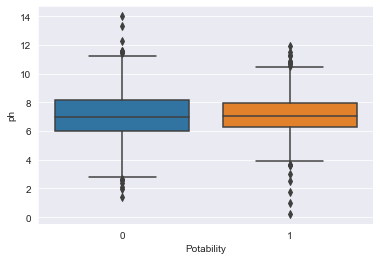

In [68]:
sns.set_style("darkgrid")
sns.boxplot(x = "Potability",y = "ph",data = df)

<AxesSubplot:xlabel='Potability', ylabel='count'>

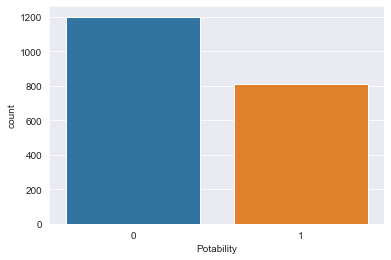

In [69]:
sns.set_style("darkgrid")
sns.countplot(x="Potability",data=df)

In [70]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

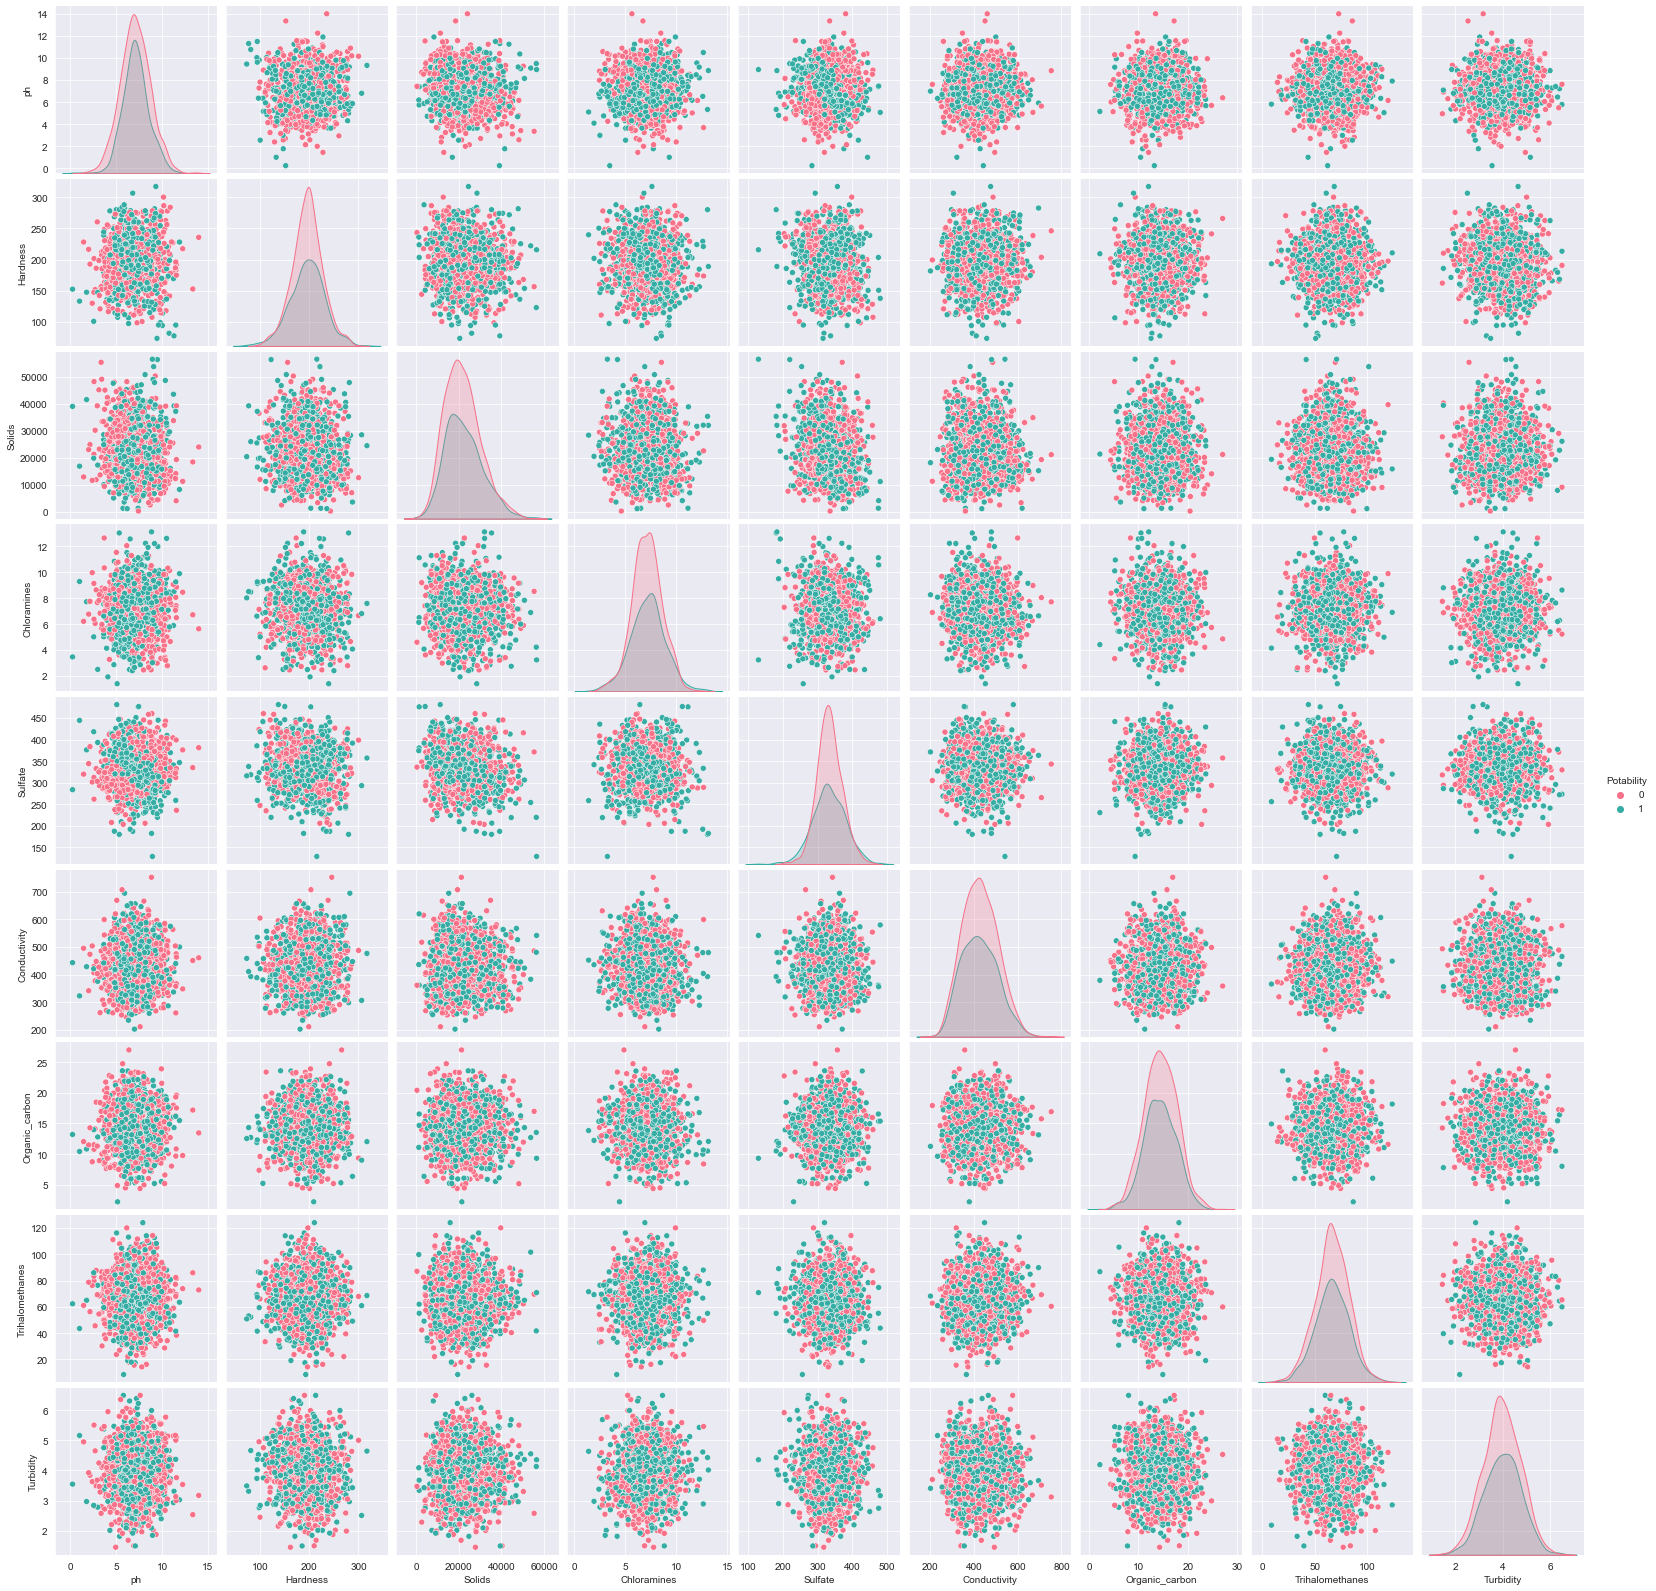

In [65]:
sns.pairplot(df, hue = 'Potability',palette = "husl")
# 1 means potable 
# 0 means not potable

In [13]:
df.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.108948 -0.087615    -0.024768  0.010524   
Hardness         0.108948  1.000000 -0.053269    -0.022685 -0.108521   
Solids          -0.087615 -0.053269  1.000000    -0.051789 -0.162769   
Chloramines     -0.024768 -0.022685 -0.051789     1.000000  0.006254   
Sulfate          0.010524 -0.108521 -0.162769     0.006254  1.000000   
Conductivity     0.014128  0.011731 -0.005198    -0.028277 -0.016192   
Organic_carbon   0.028375  0.013224 -0.005484    -0.023808  0.026776   
Trihalomethanes  0.018278 -0.015400 -0.015668     0.014990 -0.023347   
Turbidity       -0.035849 -0.034831  0.019409     0.013137 -0.009934   
Potability       0.014530 -0.001505  0.040674     0.020784 -0.015303   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.014128        0.028375         0.018278  -0.035849   
Hardness             0.011731        0.013224        -0.015400  -0.034831   
Solids              -0.005198       -0.005484        -0.015668   0.019409   
Chloramines         -0.028277       -0.023808         0.014990   0.013137   
Sulfate             -0.016192        0.026776        -0.023347  -0.009934   
Conductivity         1.000000        0.015647         0.004888   0.012495   
Organic_carbon       0.015647        1.000000        -0.005667  -0.015428   
Trihalomethanes      0.004888       -0.005667         1.000000  -0.020497   
Turbidity            0.012495       -0.015428        -0.020497   1.000000   
Potability          -0.015496       -0.015567         0.009244   0.022682   

                 Potability  
ph                 0.014530  
Hardness          -0.001505  
Solids             0.040674  
Chloramines        0.020784  
Sulfate           -0.015303  
Conductivity      -0.015496  
Organic_carbon    -0.015567  
Trihalomethanes    0.009244  
Turbidity          0.022682  
Potability         1.000000

<AxesSubplot:>

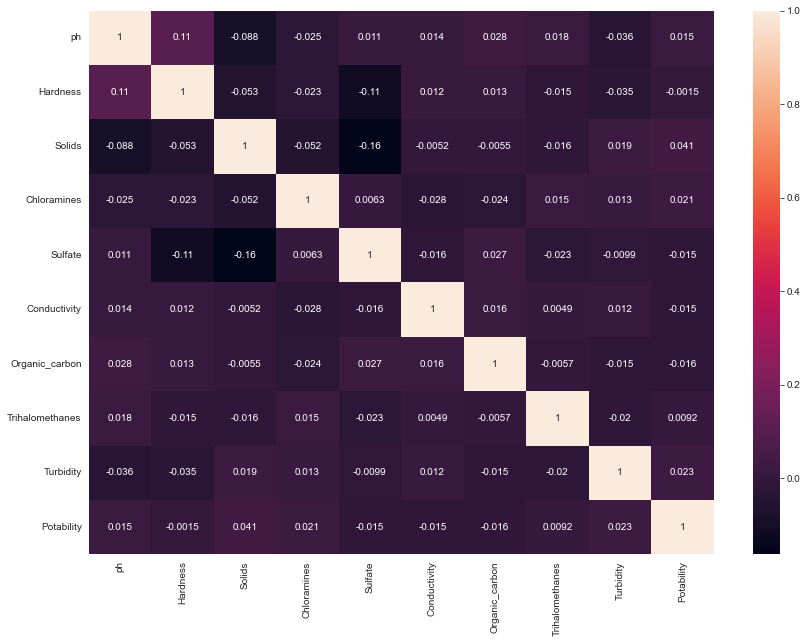

In [14]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(),annot = True)

In [15]:
X=df.drop(['Potability'], axis = 1)
Y= df['Potability']

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10) #30-70

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_test)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def models(x_train,y_train):
    #logistic regression
    lg = LogisticRegression(random_state=0)
    lg.fit(x_train,y_train)
   
    
    #DecisionTree
    tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
    tree_model.fit(x_train,y_train)
    
    
    #Randomforest
    rf = RandomForestClassifier(max_depth =4,criterion = 'entropy')
    rf.fit(x_train,y_train)
    
    #Knn
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(x_train,y_train)
    
    
    
    print("LogisticRegression score is",lg.score(x_train,y_train))
    print("DecisionTree score is", tree_model.score(x_train,y_train))
    print("RandomForest score is",rf.score(x_train,y_train))
    print("KNeighbors score is",knn.score(x_train,y_train))
    
    return lg,tree_model

model = models(x_train,y_train)

LogisticRegression score is 0.5984363894811656
DecisionTree score is 0.6616915422885572
RandomForest score is 0.6616915422885572
KNeighbors score is 0.7668798862828714


In [60]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    print('Model',i)
    
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[1][0]
    fn = cm[0][1]
    
    print(cm)
    print("Test Accuracy:", (tp + tn)/(tp+tn+fn+fp))
    print()

Model 0
[[358   0]
 [246   0]]
Test Accuracy: 0.5927152317880795

Model 1
[[343  15]
 [211  35]]
Test Accuracy: 0.6258278145695364

